In [1]:
import torchaudio
import torch
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

AUDIO_DIR = Path("data3/")
SAMPLE_RATE = 44100
SEGMENT_DURATION = 4.0
OVERLAP_RATIO = 0.75
SEGMENT_SAMPLES = int(SAMPLE_RATE * SEGMENT_DURATION)
STEP_SIZE = int(SEGMENT_SAMPLES * (1 - OVERLAP_RATIO))
MIN_RMS_THRESHOLD = 0.01


In [2]:
file_stats = []

for file in AUDIO_DIR.rglob("*.wav"):
    try:
        audio, sr = torchaudio.load(str(file))

        # Resample if needed
        if sr != SAMPLE_RATE:
            audio = torchaudio.transforms.Resample(sr, SAMPLE_RATE)(audio)

        # Convert mono to stereo
        if audio.shape[0] == 1:
            audio = torch.cat([audio, audio], dim=0)

        duration_sec = audio.shape[1] / SAMPLE_RATE
        channels = audio.shape[0]
        mean_rms = audio.std().item()
        peak = audio.abs().max().item()
        expected_segments = int((duration_sec - SEGMENT_DURATION) // STEP_SIZE + 1)

        file_stats.append({
            "filename": file.name,
            "duration_sec": round(duration_sec, 2),
            "channels": channels,
            "mean_rms": round(mean_rms, 4),
            "peak_amplitude": round(peak, 4),
            "expected_segments": expected_segments,
            "is_silent": mean_rms < MIN_RMS_THRESHOLD
        })

    except Exception as e:
        print(f"❌ Error loading {file.name}: {e}")

# Create DataFrame
df = pd.DataFrame(file_stats)

# Show head
df

filename  duration_sec  channels  mean_rms  peak_amplitude  \
0    yb11.wav        100.03         2    0.1374          0.9212   
1    yb31.wav        136.03         2    0.1817          0.8060   
2   baby2.wav         79.10         2    0.2686          1.0041   
3    yb22.wav         81.07         2    0.2916          0.9304   
4    yb15.wav         92.04         2    0.1863          0.7737   
5    yb24.wav         82.99         2    0.1858          0.7764   
6    yb34.wav         99.74         2    0.1184          0.7528   
7    yb27.wav         93.02         2    0.3109          1.0091   
8    yb28.wav         93.05         2    0.3104          1.0105   
9     yb3.wav        105.02         2    0.2644          1.0192   
10   yb13.wav         98.04         2    0.2096          0.8843   
11   yb26.wav        104.88         2    0.2660          0.7686   
12   yb23.wav         84.02         2    0.1649          0.7818   
13   yb17.wav         76.03         2    0.1409          0.8503   
14   yb16.wav         92.83         2    0.2071          0.8688   
15   yb10.wav        110.04         2    0.1625          0.7826   
16    yb1.wav        105.02         2    0.3121          1.0373   
17    yb5.wav         79.03         2    0.1728          0.9210   
18   yb30.wav        115.10         2    0.0707          0.5044   
19   yb20.wav         66.98         2    0.2532          1.0109   
20   yb12.wav        101.98         2    0.1285          0.9476   
21   yb29.wav        120.02         2    0.0850          0.5216   
22    yb2.wav        108.77         2    0.3168          1.0203   
23   yb33.wav        100.03         2    0.1203          0.7462   
24    yb9.wav        120.02         2    0.1703          0.7904   
25   yb25.wav        105.02         2    0.2989          0.8800   
26  baby1.wav         80.04         2    0.2639          0.9723   
27    yb8.wav         87.02         2    0.2741          0.7851   
28   yb14.wav         97.08         2    0.1901          0.8408   
29    yb4.wav        122.95         2    0.2538          1.0181   
30    yb6.wav         79.01         2    0.1819          0.7641   
31   yb21.wav         81.02         2    0.2967          1.0117   
32   yb18.wav         76.15         2    0.1517          0.8064   
33    yb7.wav         87.02         2    0.2755          0.8529   
34   yb32.wav        135.94         2    0.1790          0.7729   
35   yb19.wav         68.04         2    0.2461          0.8474   

    expected_segments  is_silent  
0                   1      False  
1                   1      False  
2                   1      False  
3                   1      False  
4                   1      False  
5                   1      False  
6                   1      False  
7                   1      False  
8                   1      False  
9                   1      False  
10                  1      False  
11                  1      False  
12                  1      False  
13                  1      False  
14                  1      False  
15                  1      False  
16                  1      False  
17                  1      False  
18                  1      False  
19                  1      False  
20                  1      False  
21                  1      False  
22                  1      False  
23                  1      False  
24                  1      False  
25                  1      False  
26                  1      False  
27                  1      False  
28                  1      False  
29                  1      False  
30                  1      False  
31                  1      False  
32                  1      False  
33                  1      False  
34                  1      False  
35                  1      False

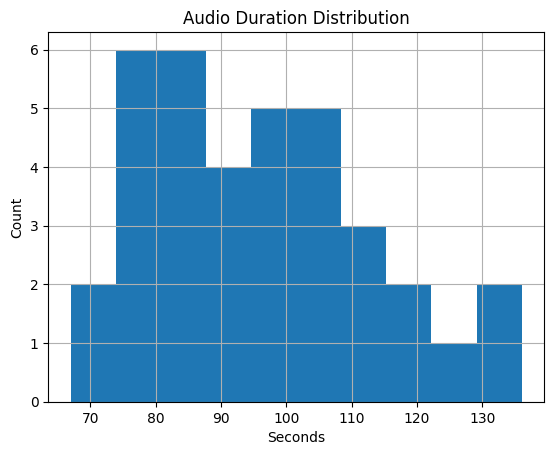

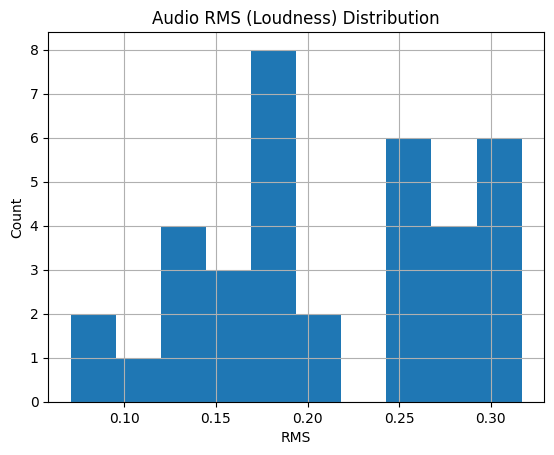

In [3]:
import matplotlib.pyplot as plt

# Duration
df["duration_sec"].hist(bins=10)
plt.title("Audio Duration Distribution")
plt.xlabel("Seconds")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# RMS
df["mean_rms"].hist(bins=10)
plt.title("Audio RMS (Loudness) Distribution")
plt.xlabel("RMS")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [4]:
total_segments = df["expected_segments"].sum()
silent_segments = df[df["is_silent"]]["expected_segments"].sum()
usable_segments = total_segments - silent_segments

print(f"Total possible segments (pre-filter): {total_segments}")
print(f"Segments skipped due to silence: {silent_segments}")
print(f"Final usable segments: {usable_segments}")


Total possible segments (pre-filter): 36
Segments skipped due to silence: 0
Final usable segments: 36


📈 Displaying: yb11.wav


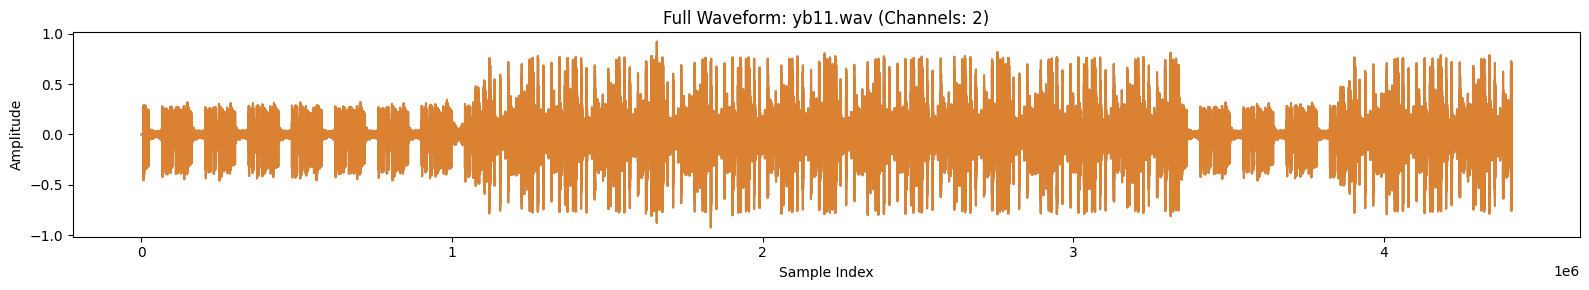

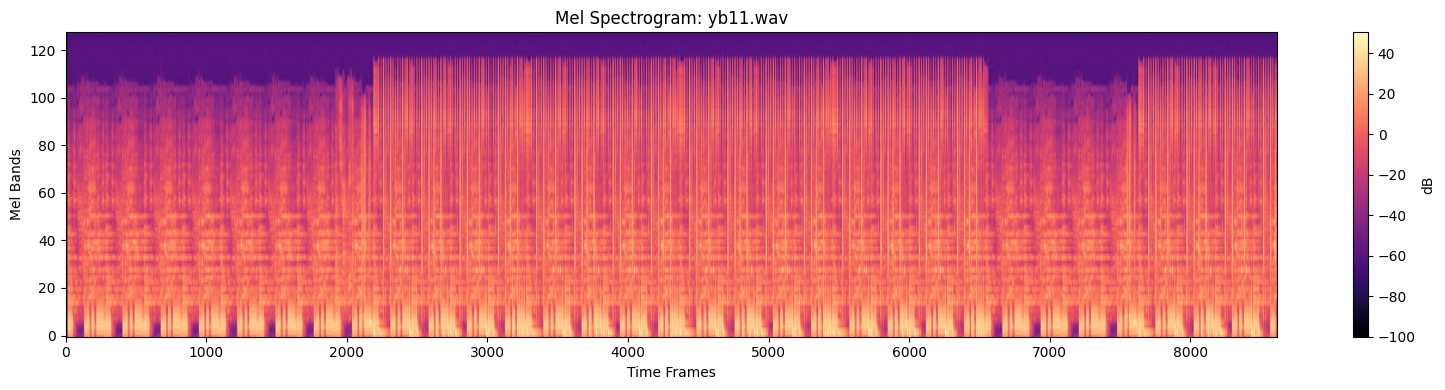

📈 Displaying: yb31.wav


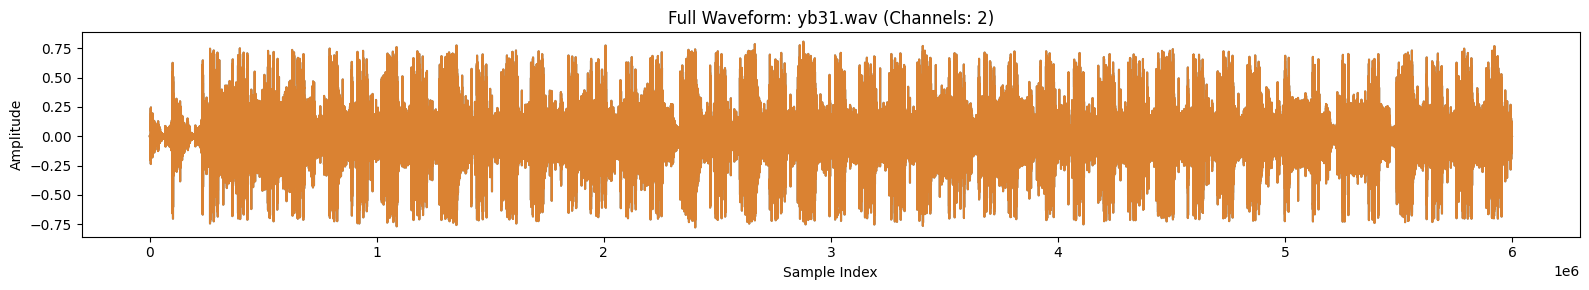

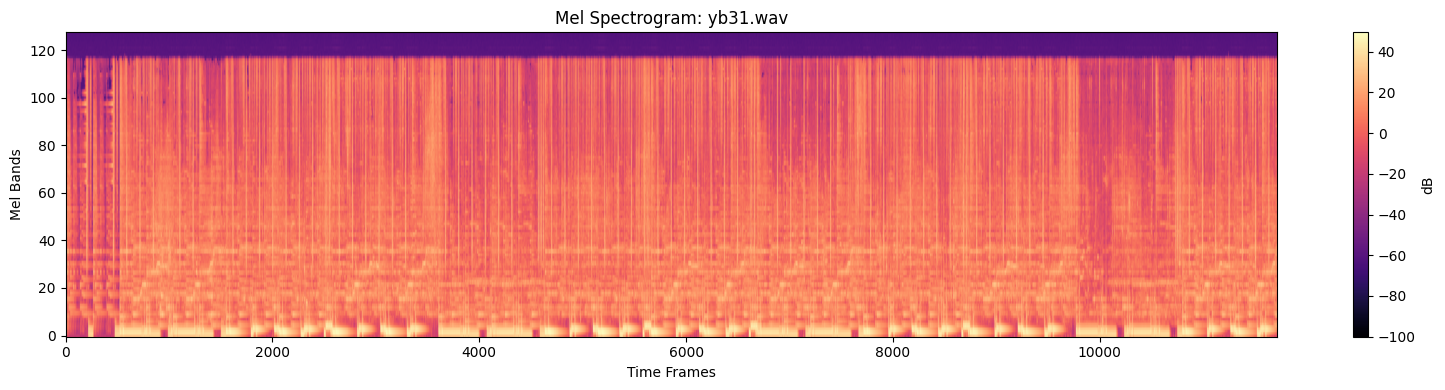

📈 Displaying: baby2.wav


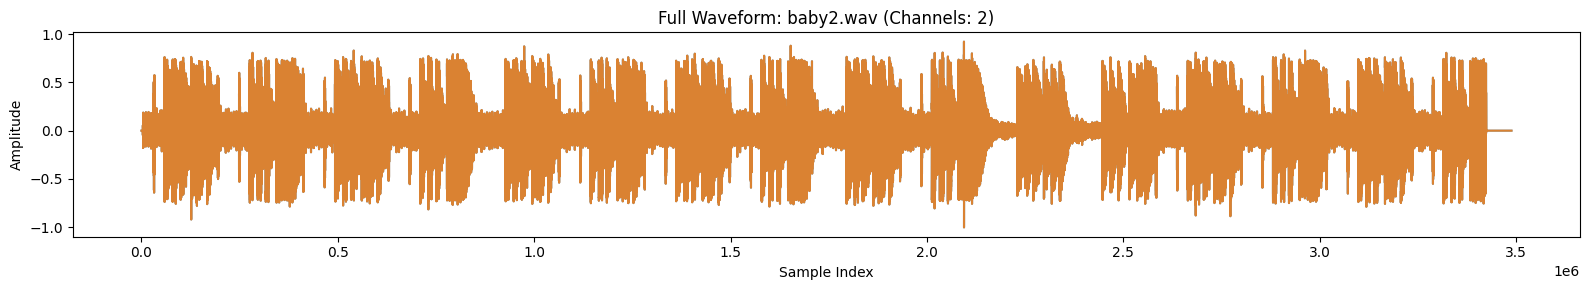

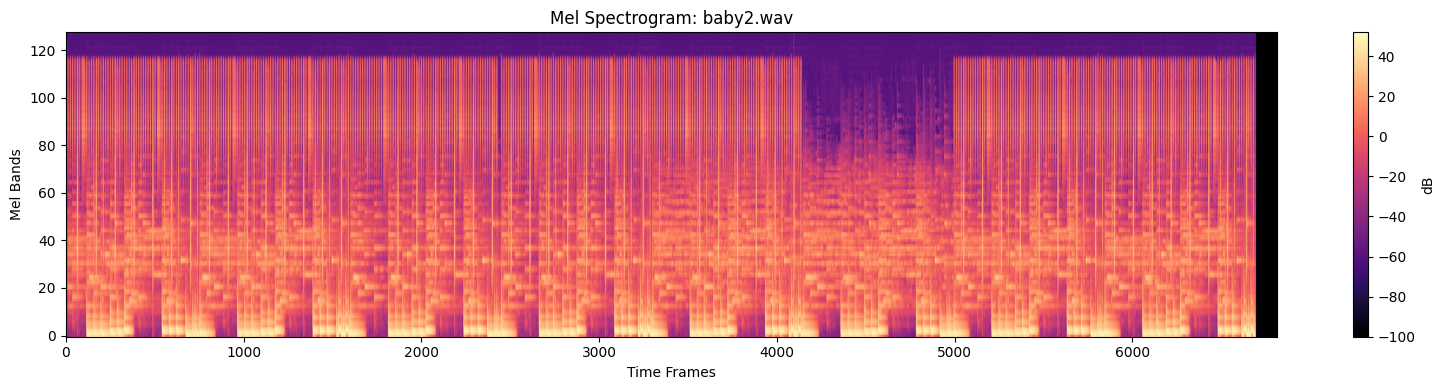

📈 Displaying: yb22.wav


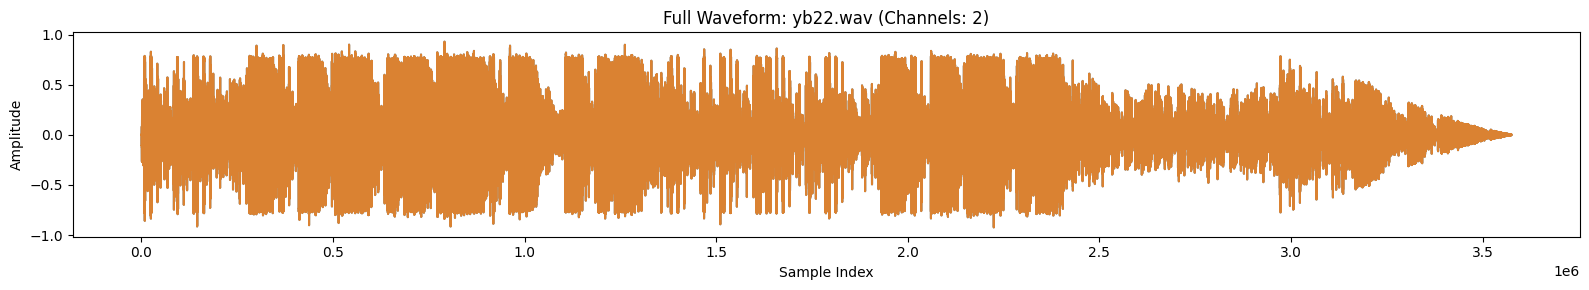

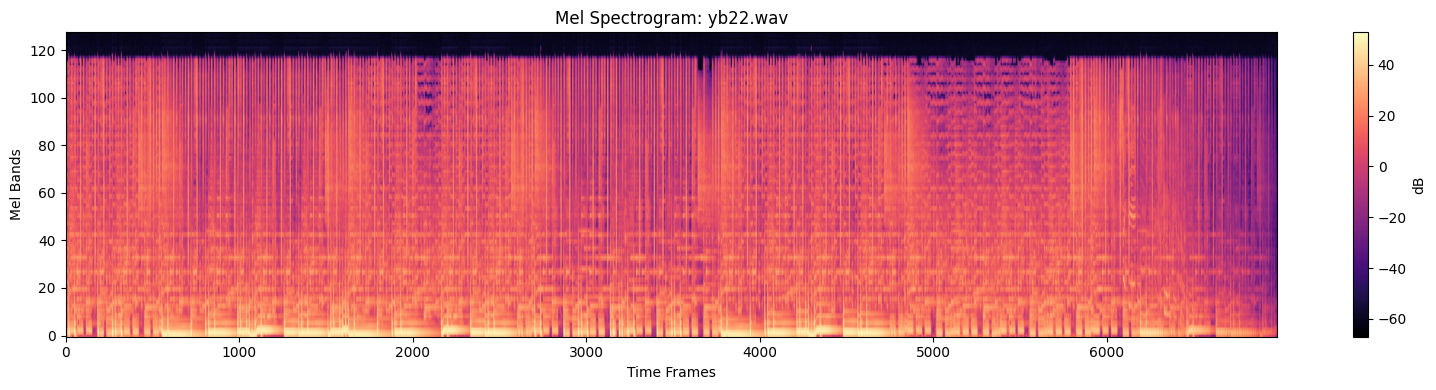

📈 Displaying: yb15.wav


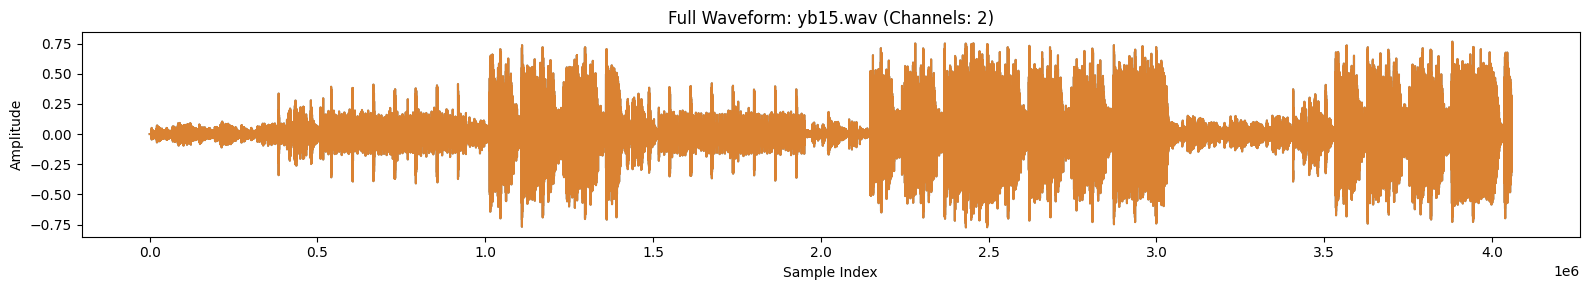

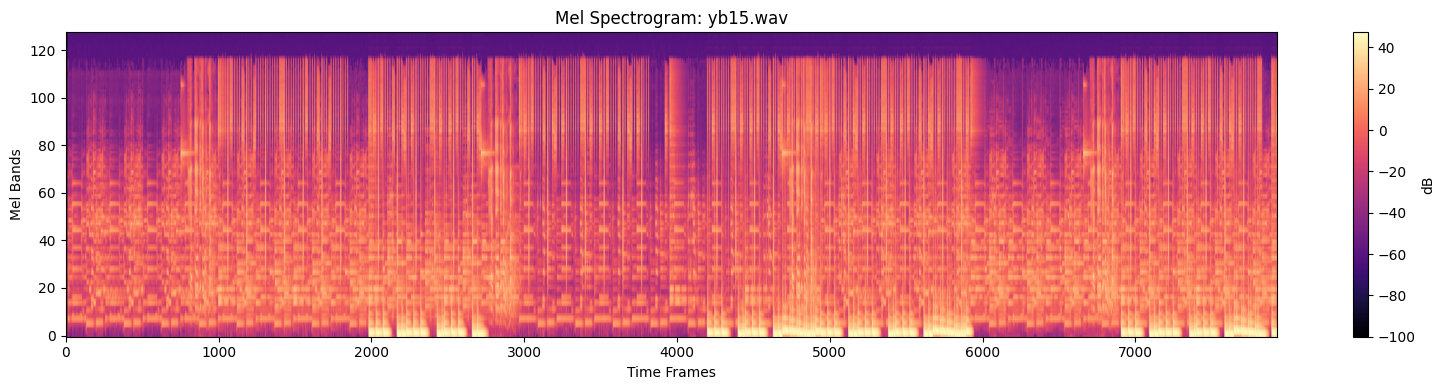

📈 Displaying: yb24.wav


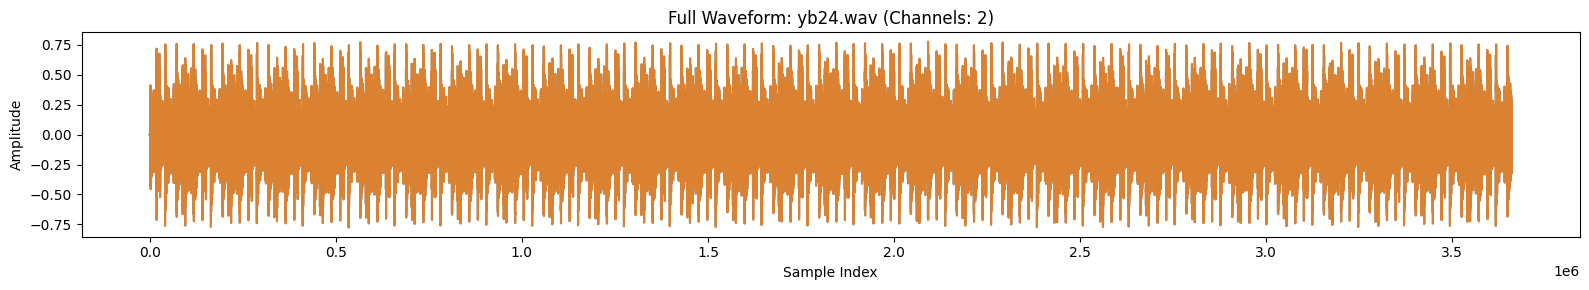

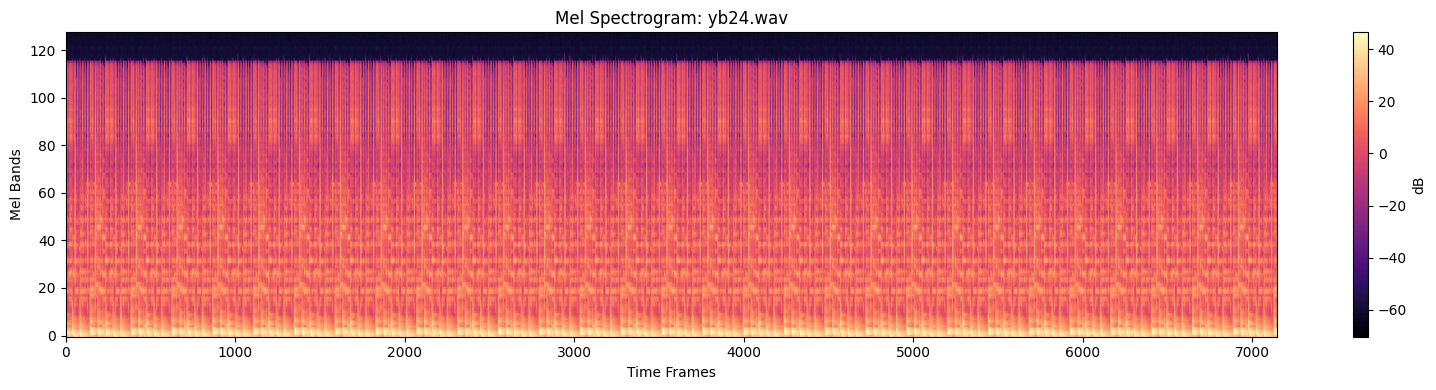

📈 Displaying: yb34.wav


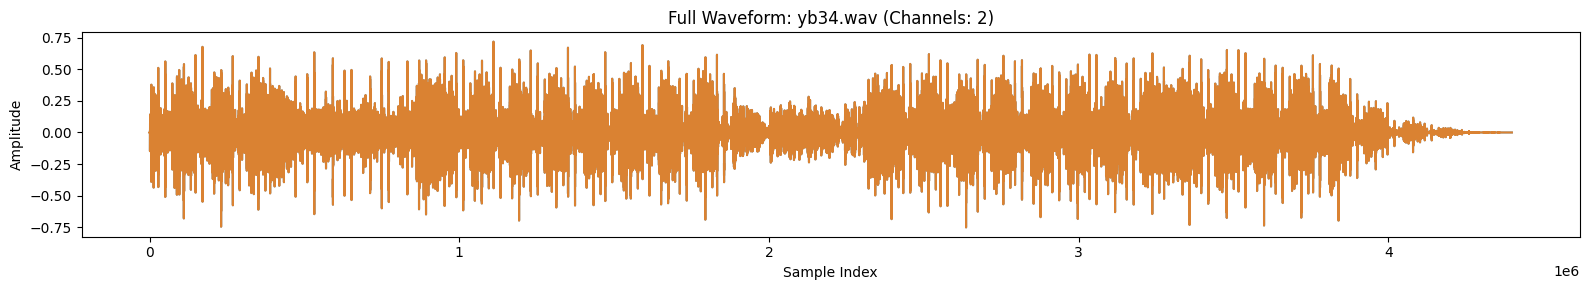

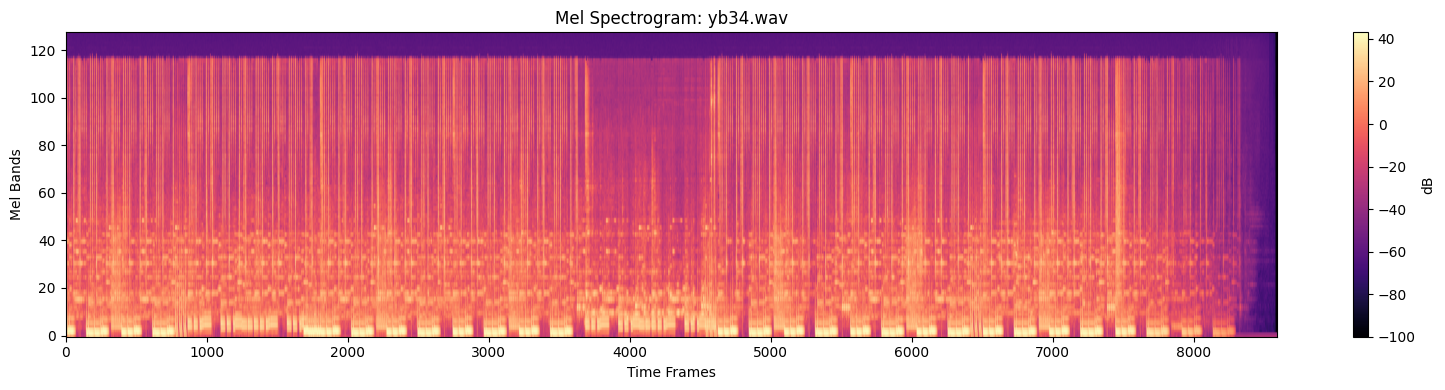

📈 Displaying: yb27.wav


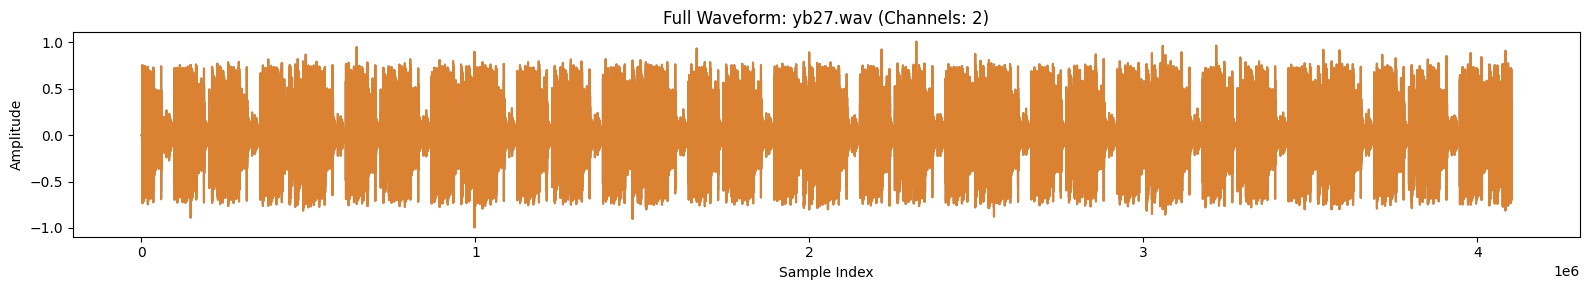

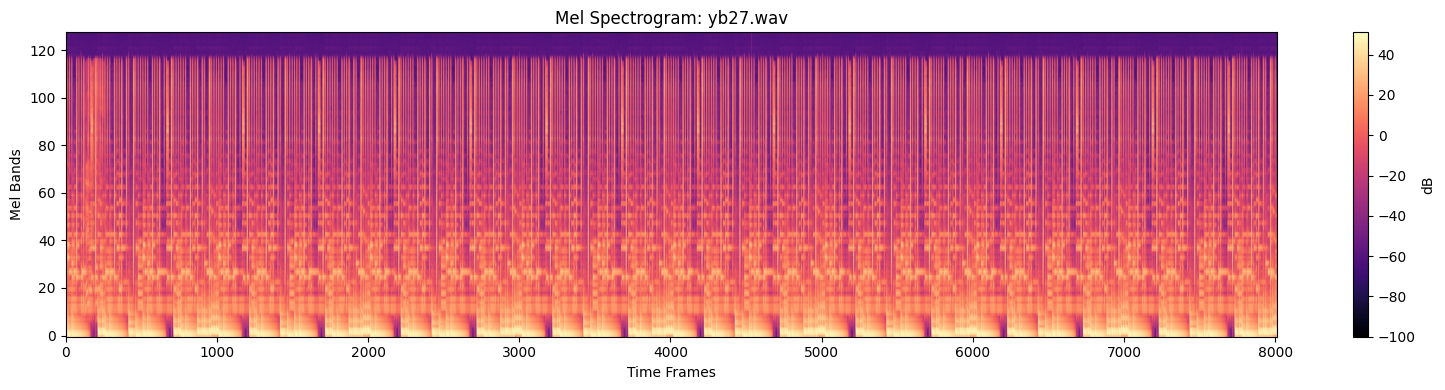

📈 Displaying: yb28.wav


KeyboardInterrupt: 

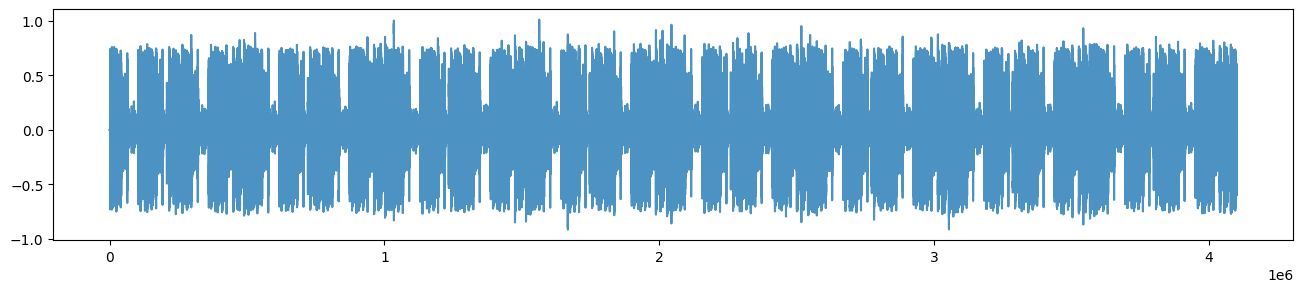

In [5]:
def plot_full_waveform_and_spec(file_path):
    audio, sr = torchaudio.load(str(file_path))
    
    if sr != SAMPLE_RATE:
        audio = torchaudio.transforms.Resample(sr, SAMPLE_RATE)(audio)

    if audio.shape[0] == 1:
        audio = torch.cat([audio, audio], dim=0)  # force stereo

    # Plot full waveform (no legend to avoid slowdown)
    plt.figure(figsize=(16, 3))
    colors = ['tab:blue', 'tab:orange']
    for i in range(audio.shape[0]):
        plt.plot(audio[i].numpy(), color=colors[i], alpha=0.8)
    plt.title(f"Full Waveform: {file_path.name} (Channels: {audio.shape[0]})")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

    # Compute and plot mel spectrogram
    mel_spec = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=2048,
        hop_length=512
    )(audio[0].unsqueeze(0))
    
    mel_db = torchaudio.transforms.AmplitudeToDB()(mel_spec)

    plt.figure(figsize=(16, 4))
    plt.imshow(mel_db[0].cpu().numpy(), aspect='auto', origin='lower', cmap='magma')
    plt.title(f"Mel Spectrogram: {file_path.name}")
    plt.xlabel("Time Frames")
    plt.ylabel("Mel Bands")
    plt.colorbar(label="dB")
    plt.tight_layout()
    plt.show()

# 🚀 Plot for all .wav files
wav_files = list(AUDIO_DIR.rglob("*.wav"))

if not wav_files:
    print("❌ No .wav files found in the directory.")
else:
    for file in wav_files:
        print(f"📈 Displaying: {file.name}")
        plot_full_waveform_and_spec(file)

In [6]:
import json
import numpy as np
from pathlib import Path

latent_dir = Path("data3_preencoded_overlap")
errors = []

for npy_file in latent_dir.glob("*.npy"):
    json_file = npy_file.with_suffix(".json")

    # Check if metadata file exists
    if not json_file.exists():
        errors.append(f"❌ Missing JSON: {json_file.name}")
        continue

    try:
        latent = np.load(npy_file)
    except Exception as e:
        errors.append(f"❌ Failed to load {npy_file.name}: {e}")
        continue

    try:
        meta = json.loads(json_file.read_text())
    except Exception as e:
        errors.append(f"❌ Failed to load JSON: {json_file.name}: {e}")
        continue

    # Check prompt
    if "prompt" not in meta or not meta["prompt"].strip():
        errors.append(f"❌ Missing or empty prompt: {json_file.name}")

    # Check padding mask
    if "padding_mask" not in meta:
        errors.append(f"❌ Missing padding_mask: {json_file.name}")
    elif len(meta["padding_mask"]) != latent.shape[-1]:
        errors.append(f"❌ padding_mask length mismatch: {json_file.name}")

    # Optional: Check if latent is collapsed
    if np.abs(latent).max() < 1e-5:
        errors.append(f"⚠️ Latent may be collapsed (near-zero values): {npy_file.name}")

print(f"\n🔍 {len(errors)} issue(s) found.")
for e in errors:
    print(e)



🔍 0 issue(s) found.


In [7]:
import numpy as np
from pathlib import Path

latent_dir = Path("/workspace/data3_preencoded_overlap")

stats = []

for f in sorted(latent_dir.glob("*.npy")):
    latent = np.load(f)

    max_val = np.abs(latent).max()
    mean = latent.mean()
    std = latent.std()

    stats.append((f.name, max_val, mean, std))

# Print bad ones
print("\n🔎 Checking for normalization issues:\n")
for fname, max_val, mean, std in stats:
    if max_val < 1e-4:
        print(f"❌ {fname} — COLLAPSED (max={max_val:.5f})")
    elif max_val > 10.0:
        print(f"⚠️ {fname} — possible EXPLOSION (max={max_val:.2f})")
    elif std < 0.01:
        print(f"⚠️ {fname} — very low variance (std={std:.5f})")
    else:
        print(f"✅ {fname} — OK (max={max_val:.3f}, std={std:.3f})")



🔎 Checking for normalization issues:

